# Prediksi Cuaca Kemayoran dengan LSTM



*   1519620030 Khoulah 'Afiifah
*   1519620037 Zaimah Fira Azzahra



Dataset yang dianalisis dalam penelitian ini merupakan dataset dari website BMKG Stasiun Meteorologi Kemayoran. Kumpulan data yang digunakan pada penelitian ini terdiri dari 7 atribut tahun dan 1810 record. Dari data ini akan dilakukan training dengan metode LSTM.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [30]:
df = pd.read_csv('/content/iklim_kemayoran_18_23.csv')
df.head(10)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ff_avg
0,2018-01-01,25.0,33.2,28.6,78.0,46.4,1.0
1,2018-01-02,26.0,33.6,29.8,69.0,0.0,1.0
2,2018-01-03,27.0,31.2,28.4,77.0,0.0,1.0
3,2018-01-04,26.0,33.8,29.3,75.0,1.0,1.0
4,2018-01-05,27.0,30.8,28.9,68.0,0.5,3.0
5,2018-01-06,26.0,32.8,28.9,69.0,0.0,3.0
6,2018-01-07,26.0,30.4,28.8,75.0,8888.0,1.0
7,2018-01-08,27.0,32.2,28.6,74.0,0.0,2.0
8,2018-01-09,27.0,30.6,28.4,76.0,0.0,2.0
9,2018-01-10,25.0,31.6,28.3,73.0,8888.0,2.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1954 non-null   object 
 1   Tn       1954 non-null   float64
 2   Tx       1954 non-null   float64
 3   Tavg     1954 non-null   float64
 4   RH_avg   1954 non-null   float64
 5   RR       1950 non-null   float64
 6   ff_avg   1849 non-null   float64
dtypes: float64(6), object(1)
memory usage: 107.0+ KB


In [32]:
#Missing values computation
df.isnull().sum()

Tanggal      0
Tn           0
Tx           0
Tavg         0
RH_avg       0
RR           4
ff_avg     105
dtype: int64

In [33]:
df=df.dropna(axis=0)

# Mengubah kolom 'Tanggal' menjadi indeks datetime

In [34]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace= True)

#Memvisualisasikan data

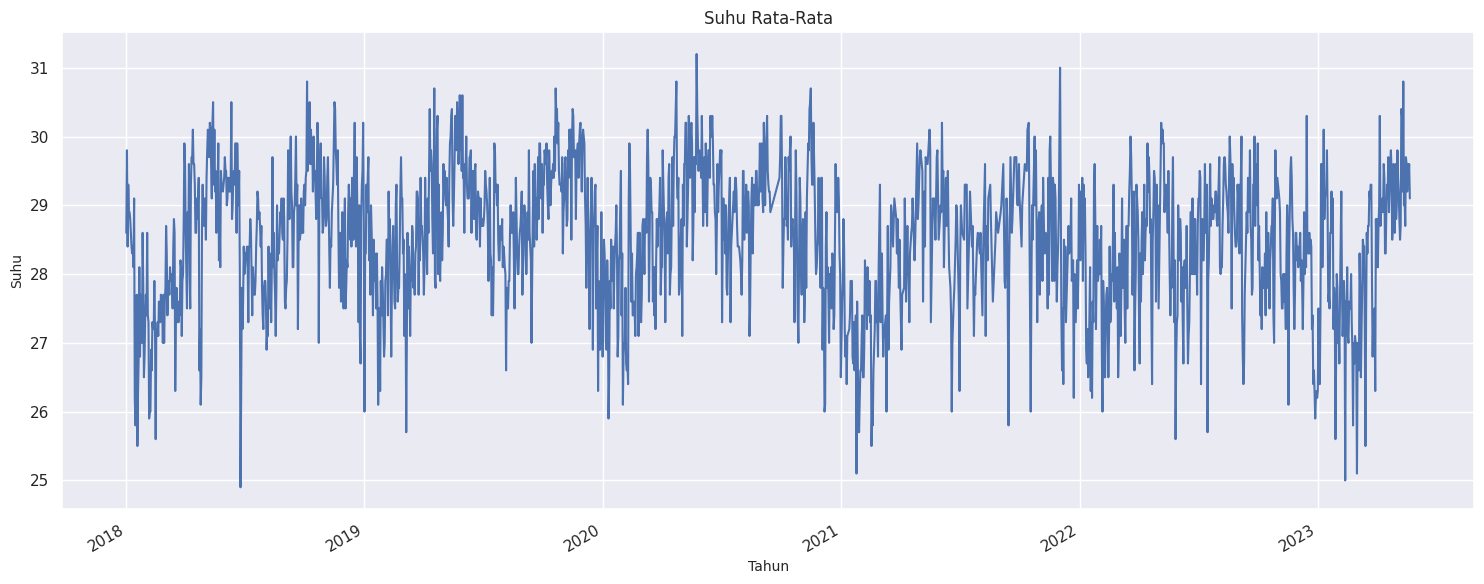

In [35]:
plt.figure(figsize=(15, 6))
df['Tavg'].plot()
plt.xlabel('Tahun', fontsize=10)
plt.ylabel('Suhu', fontsize=10)
plt.title("Suhu Rata-Rata")
plt.tight_layout()
plt.show()

#Melihat data shape

In [36]:
n_cols = 1
dataset = df['Tavg']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1849, 1)

#Melakukan komputasi MinMaxScaler 
yang mempertahankan bentuk distribusi asli dengan mengurangkan nilai minimum dalam fitur lalu membagi dengan range

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

#Melakukan splitting data 
menjadi 75:25 untuk training dan testing

In [38]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1386 Test Size : 463


In [39]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1386, 1)

# Menentukan training set dengan 50 time steps.

In [40]:
x_train = []
y_train = []
time_steps = 50
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.58730159],
       [0.77777778],
       [0.55555556],
       [0.6984127 ],
       [0.63492063],
       [0.63492063],
       [0.61904762],
       [0.58730159],
       [0.55555556],
       [0.53968254],
       [0.55555556],
       [0.50793651],
       [0.66666667],
       [0.20634921],
       [0.14285714],
       [0.3968254 ],
       [0.44444444],
       [0.0952381 ],
       [0.22222222],
       [0.3015873 ],
       [0.50793651],
       [0.3015873 ],
       [0.44444444],
       [0.38095238],
       [0.33333333],
       [0.58730159],
       [0.46031746],
       [0.25396825],
       [0.3015873 ],
       [0.3968254 ],
       [0.44444444],
       [0.3968254 ],
       [0.58730159],
       [0.3968254 ],
       [0.38095238],
       [0.15873016],
       [0.17460317],
       [0.17460317],
       [0.31746032],
       [0.26984127],
       [0.38095238],
       [0.36507937],
       [0.36507937],
       [0.47619048],
       [0.36507937],
       [0.11111111],
       [0.36507937],
  

In [41]:
x_train, y_train = np.array(x_train), np.array(y_train)

#Training set dikonversi menjadi numpy array dan dibentuk shape-nya.

In [42]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [43]:
x_train.shape , y_train.shape

((1799, 50, 1), (1799, 1))

#Membangun model LSTM 
dengan 3 layer LSTM dengan layer pertama sebesar 200 neuron, layer kedua sebesar 10 neuron dan layer ketiga sebesar 50 neuron serta layer dense dengan layer pertama sebesar 20 neuron, layer kedua sebesar 10 neuron, dan layer ketiga sebesar 1 neuron. Optimizer menggunakan optimizer adam, untuk loss terdapat mean_absolute_error. 

In [44]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics= "mean_absolute_error")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 200)           161600    
                                                                 
 lstm_4 (LSTM)               (None, 50, 100)           120400    
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 313,441
Trainable params: 313,441
Non-tr

#Melakukan fit model 
dengan epoch sebesar 100 dan ukuran batch sebesar 32

In [45]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
57/57 [==============================] - 18s 224ms/step - loss: 0.1944 - mean_absolute_error: 0.3548
Epoch 2/100
57/57 [==============================] - 13s 221ms/step - loss: 0.0209 - mean_absolute_error: 0.1133
Epoch 3/100
57/57 [==============================] - 13s 223ms/step - loss: 0.0201 - mean_absolute_error: 0.1112
Epoch 4/100
57/57 [==============================] - 13s 223ms/step - loss: 0.0197 - mean_absolute_error: 0.1100
Epoch 5/100
57/57 [==============================] - 13s 221ms/step - loss: 0.0196 - mean_absolute_error: 0.1100
Epoch 6/100
57/57 [==============================] - 13s 222ms/step - loss: 0.0202 - mean_absolute_error: 0.1122
Epoch 7/100
57/57 [==============================] - 12s 219ms/step - loss: 0.0196 - mean_absolute_error: 0.1099
Epoch 8/100
57/57 [==============================] - 14s 250ms/step - loss: 0.0195 - mean_absolute_error: 0.1090
Epoch 9/100
57/57 [==============================] - 13s 223ms/step - loss: 0.0191 - mean_absolu

#Mengukur Loss
Dari hasil dapat disimpulkan bahwa kurva model loss menunjukan hasil kurva menurun dengan baik dan tidak terjadi overfitting yang berlebihan.

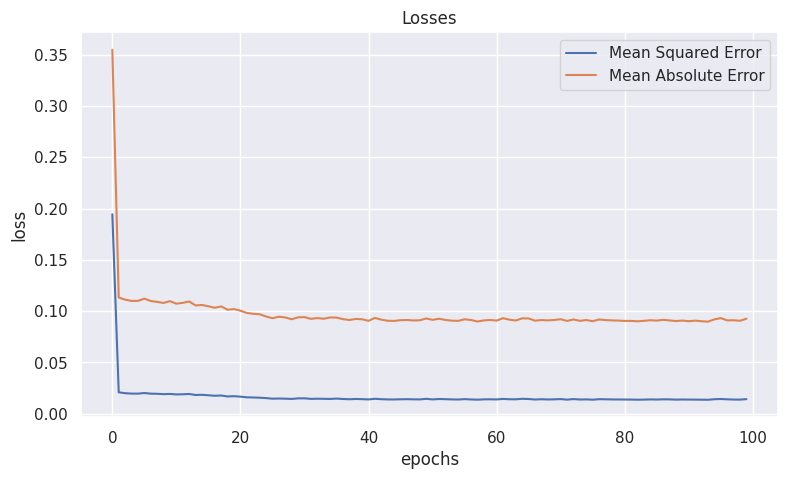

In [47]:
plt.figure(figsize=(9, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#Melakukan prediksi
Data test dibuatkan dengan 50 time steps, kemudian dilakukan juga standardisasi dengan scaler.inverse_transform serta mengkomputasi root mean square error.

In [48]:
# Membuat data test dengan 50 time-steps and 1 output
time_steps = 50
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [49]:
# Get Prediction
predictions = model.predict(x_test)

15/15 [==============================] - 1s 64ms/step


In [50]:
predictions.shape

(463, 1)

In [51]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(463, 1)

In [52]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [53]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.12

#Plotting prediksi

In [54]:

preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts


,Predictions,Actuals
0,27.805191,27.2
1,27.530996,26.5
2,27.216728,27.1
3,27.397881,28.4
4,28.168373,27.3
...,...,...
458,29.474537,29.2
459,29.345127,29.6
460,29.540653,29.4
461,29.407026,29.6


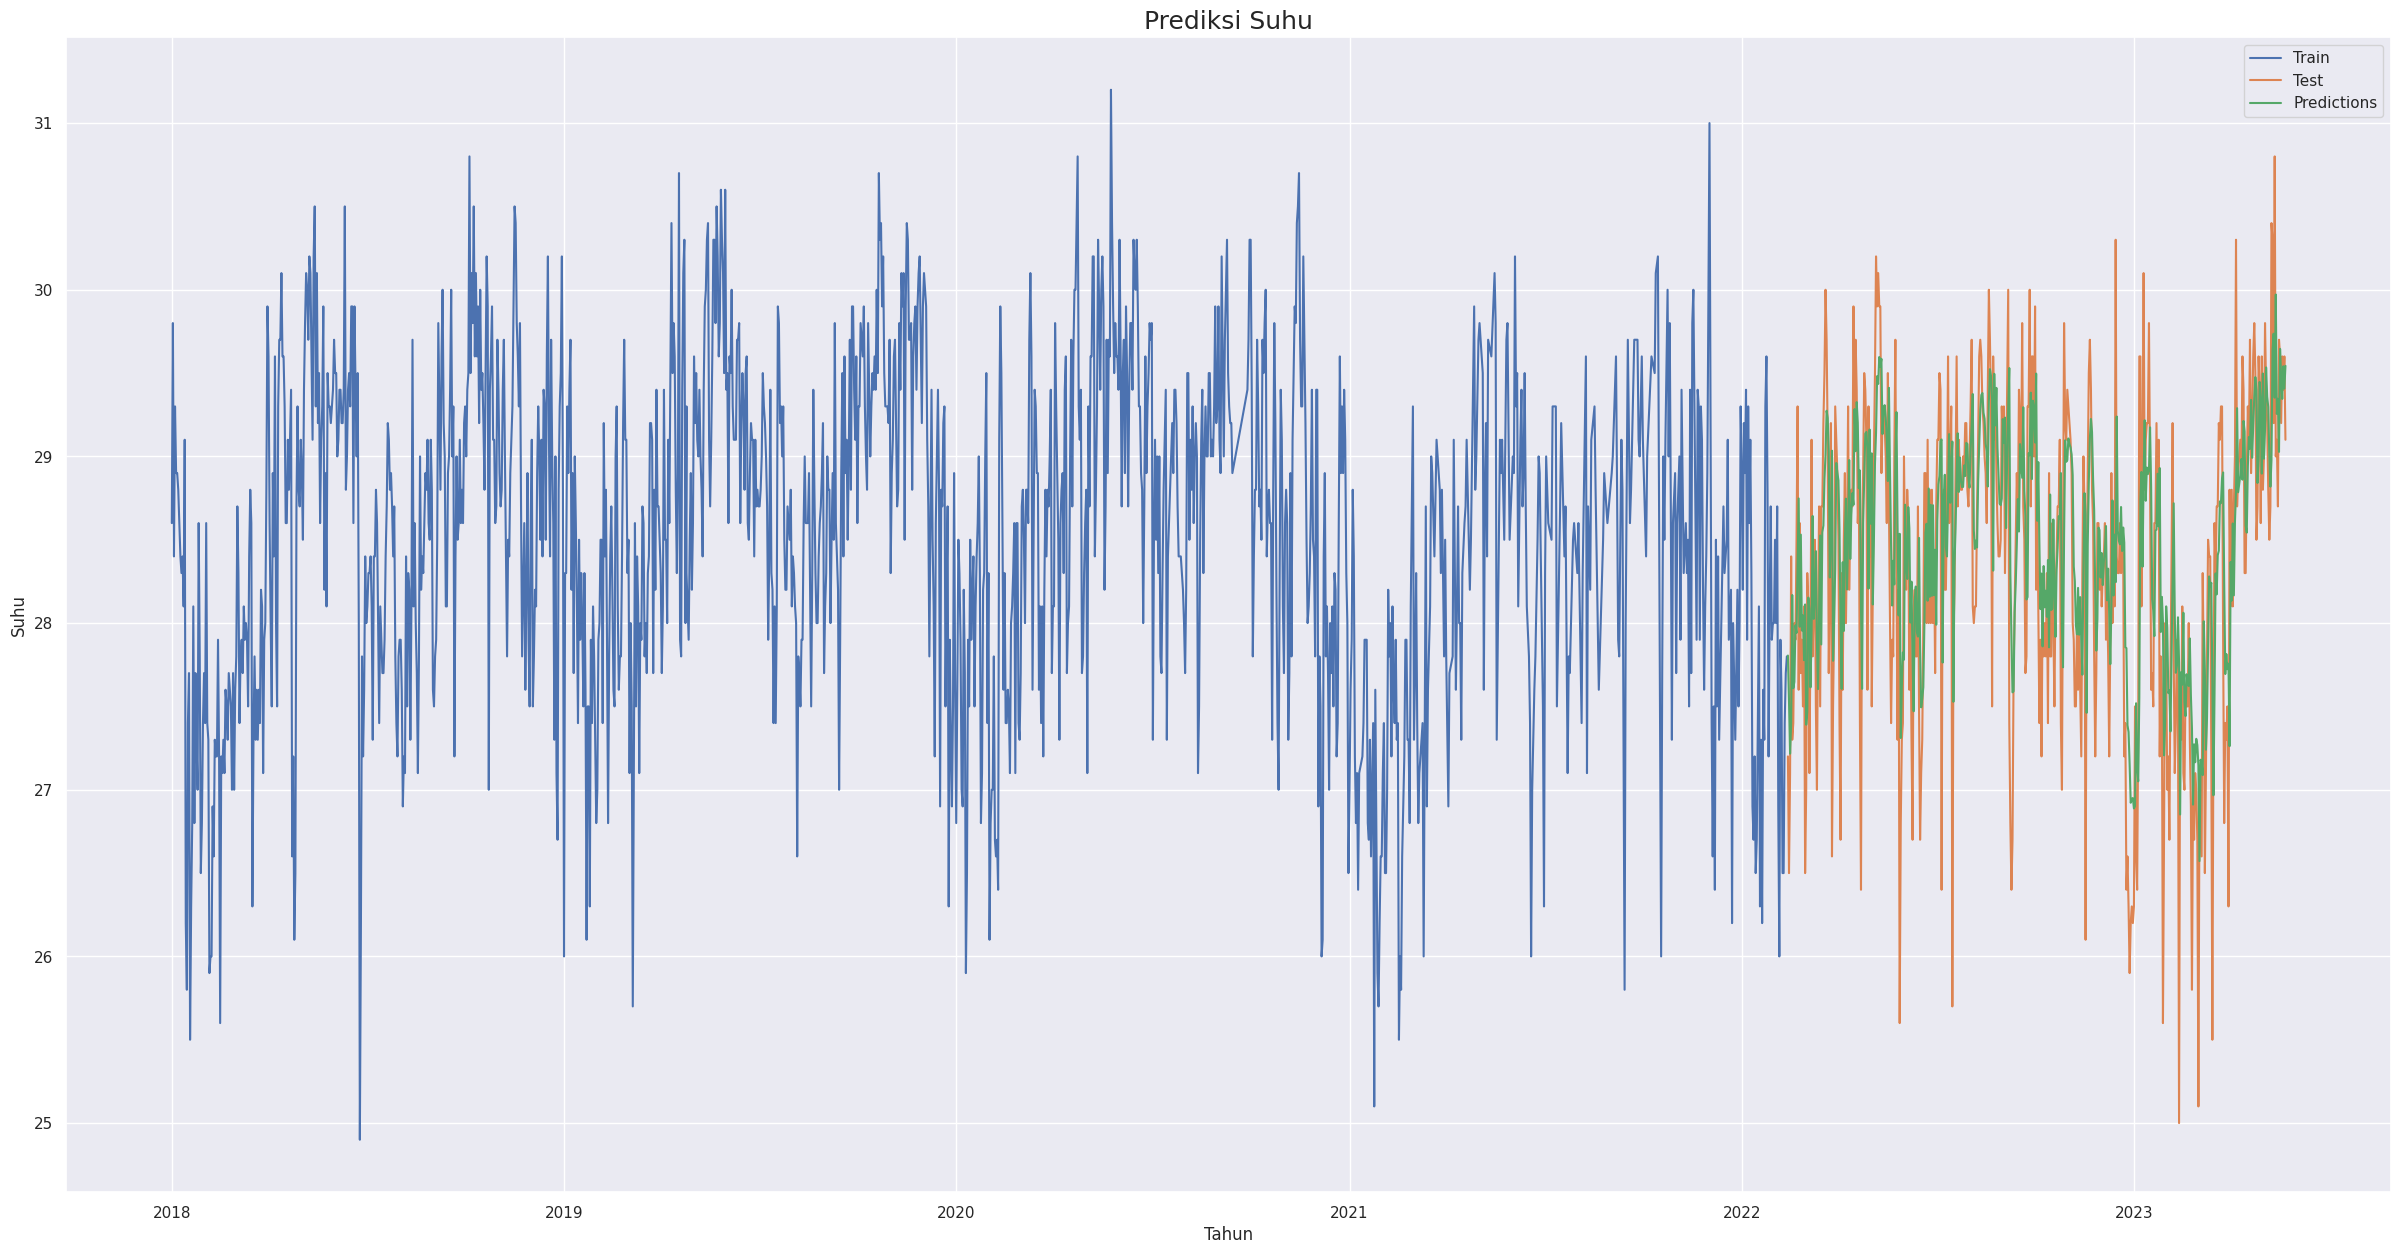

In [55]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (30, 15))
plt.title('Prediksi Suhu', fontsize= 18)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Suhu', fontsize=12)
plt.plot(train['Tavg'])
plt.plot(test['Tavg'])
plt.plot(test['Predictions'])
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

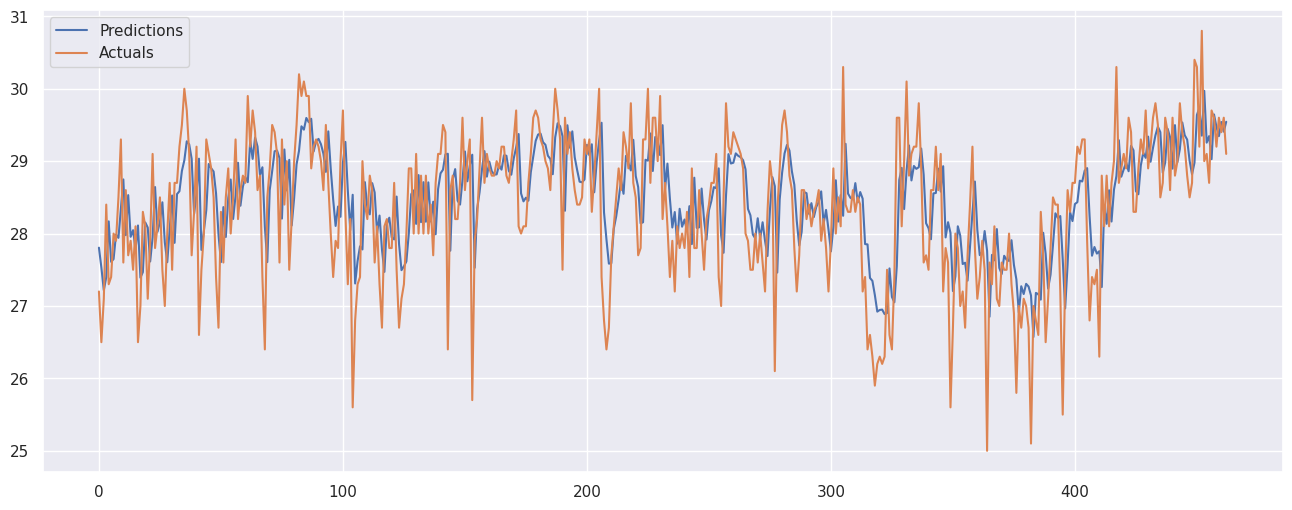

In [56]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [57]:
preds_acts = pd.DataFrame(data={'Prediksi':predictions.flatten()})
preds_acts

,Prediksi
0,27.805191
1,27.530996
2,27.216728
3,27.397881
4,28.168373
...,...
458,29.474537
459,29.345127
460,29.540653
461,29.407026


#Kesimpulan
Walaupun model tidak dapat memprediksi semua titik dengan akurat, model masih dapat memprediksi beberapa titik dengan akurat. Kedepannya akan dicoba model dengan hasil overfitting yang lebih kecil lagi.